# Week 10 

# Bhanu Nithin Yadav

# Prediction of the closing stock price for the next of CAPGEMINI 

Our goal is to forecast the closing stock price of the following day for a n number of prior prices. 

Therefore, our model must accept n characteristics, each of which is the stock price for the previous X days in order.

Link for the data set : https://finance.yahoo.com/quote/CAP.PA/history?period1=1680998400&period2=1682294400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

Here we have taken the stock history of Capgemini (which I've been a part of for 2 years) for the past 1 year and we will be predicting the stock closing price of the next day. The data is been downloaded as CSV file and will be used further in this process


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

## Data Pre processing

In [2]:
df = pd.read_csv("C:/Users/Nithin Yadav/Downloads/CAP.PA (2).csv",  parse_dates=True)

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df = df[['Close']]  # target 

In [5]:
df

,Close
0,188.000000
1,185.350006
2,186.500000
3,196.100006
4,196.100006
...,...
252,162.949997
253,166.300003
254,163.899994
255,160.399994


In [6]:
df['Close'].isna().sum() #checking for null vlaues

0


no null values found

In [7]:
row_count = df.shape[0]  
row_count

257

In [8]:
new_df = df.to_numpy() 
new_df.shape

(257, 1)

In [9]:
sequence_length = 10  # number of days

In [10]:
new_df = new_df[row_count % sequence_length: ] # for simplier calculation we are reducing the rows to the multiple of the sequence length
                                              
new_df.shape

(250, 1)

In [11]:
new_df = new_df.reshape(row_count // sequence_length, sequence_length) 
new_df

array([[190.550003, 189.350006, 183.75    , 177.75    , 176.699997,
        179.699997, 180.449997, 184.25    , 184.949997, 187.600006],
       [181.899994, 178.350006, 180.75    , 184.      , 181.649994,
        182.449997, 184.350006, 186.600006, 186.399994, 180.5     ],
       [176.100006, 178.800003, 179.949997, 182.25    , 180.25    ,
        178.5     , 176.449997, 169.850006, 169.350006, 165.75    ],
       [169.399994, 166.      , 168.5     , 168.399994, 171.449997,
        174.899994, 174.550003, 178.350006, 181.      , 174.699997],
       [169.      , 163.449997, 161.75    , 157.300003, 155.399994,
        159.100006, 164.100006, 167.5     , 166.199997, 164.550003],
       [162.75    , 159.899994, 165.149994, 165.399994, 167.5     ,
        167.050003, 171.      , 171.100006, 169.800003, 169.5     ],
       [167.800003, 170.699997, 185.350006, 185.399994, 185.5     ,
        189.5     , 190.649994, 188.350006, 188.350006, 187.      ],
       [190.100006, 189.899994, 188.05000

In [12]:
# Create a new dataframe

df_2 = pd.DataFrame(new_df, columns=np.arange(0,10,1))

df_2

,0,1,2,3,4,5,6,7,8,9
0,190.550003,189.350006,183.750000,177.750000,176.699997,179.699997,180.449997,184.250000,184.949997,187.600006
1,181.899994,178.350006,180.750000,184.000000,181.649994,182.449997,184.350006,186.600006,186.399994,180.500000
2,176.100006,178.800003,179.949997,182.250000,180.250000,178.500000,176.449997,169.850006,169.350006,165.750000
3,169.399994,166.000000,168.500000,168.399994,171.449997,174.899994,174.550003,178.350006,181.000000,174.699997
4,169.000000,163.449997,161.750000,157.300003,155.399994,159.100006,164.100006,167.500000,166.199997,164.550003
5,162.750000,159.899994,165.149994,165.399994,167.500000,167.050003,171.000000,171.100006,169.800003,169.500000
6,167.800003,170.699997,185.350006,185.399994,185.500000,189.500000,190.649994,188.350006,188.350006,187.000000
7,190.100006,189.899994,188.050003,188.899994,188.250000,186.449997,187.300003,186.199997,180.850006,180.600006
8,182.399994,182.449997,178.399994,174.500000,175.100006,173.000000,170.149994,176.350006,174.750000,174.850006
9,174.300003,175.550003,179.399994,182.800003,178.149994,178.300003,171.199997,166.250000,168.050003,161.800003


#  Standardization

In [13]:
df_2 = np.array(new_df).ravel().reshape(-1,1)

df_2.shape

(250, 1)

In [14]:
df_2

array([[190.550003],
       [189.350006],
       [183.75    ],
       [177.75    ],
       [176.699997],
       [179.699997],
       [180.449997],
       [184.25    ],
       [184.949997],
       [187.600006],
       [181.899994],
       [178.350006],
       [180.75    ],
       [184.      ],
       [181.649994],
       [182.449997],
       [184.350006],
       [186.600006],
       [186.399994],
       [180.5     ],
       [176.100006],
       [178.800003],
       [179.949997],
       [182.25    ],
       [180.25    ],
       [178.5     ],
       [176.449997],
       [169.850006],
       [169.350006],
       [165.75    ],
       [169.399994],
       [166.      ],
       [168.5     ],
       [168.399994],
       [171.449997],
       [174.899994],
       [174.550003],
       [178.350006],
       [181.      ],
       [174.699997],
       [169.      ],
       [163.449997],
       [161.75    ],
       [157.300003],
       [155.399994],
       [159.100006],
       [164.100006],
       [167.5

## Standardize the values

In [15]:
# using StandardScaler to standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

std = scaler.fit_transform(df_2)

## Reshaping to 10 day format

In [16]:
new_shape = std.reshape(25,10)

new_shape.shape

(25, 10)

In [17]:
pd.DataFrame(new_shape, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,1.943921,1.812103,1.196952,0.537862,0.422520,0.752066,0.834452,1.251876,1.328770,1.619869
1,0.993732,0.603771,0.867407,1.224414,0.966270,1.054149,1.262862,1.510020,1.488049,0.839945
2,0.356612,0.653203,0.779528,1.032179,0.812483,0.620248,0.395058,-0.329940,-0.384864,-0.780319
3,-0.379373,-0.752857,-0.478236,-0.489221,-0.154184,0.224793,0.186347,0.603771,0.894869,0.202824
4,-0.423312,-1.032971,-1.219712,-1.708537,-1.917250,-1.510810,-0.961568,-0.588084,-0.730888,-0.912137
5,-1.109864,-1.422933,-0.846229,-0.818767,-0.588084,-0.637516,-0.203615,-0.192629,-0.335433,-0.368388
6,-0.555129,-0.236570,1.372710,1.378201,1.389187,1.828580,1.954905,1.702255,1.702255,1.553959
7,1.894490,1.872519,1.669300,1.762670,1.691270,1.493542,1.586914,1.466080,0.878392,0.850930
8,1.048656,1.054149,0.609262,0.180854,0.246764,0.016082,-0.296987,0.384075,0.208316,0.219302
9,0.158885,0.296196,0.719111,1.092596,0.581800,0.598279,-0.181646,-0.725395,-0.527667,-1.214220


In [18]:
# creating  X and y. 
# X is 9 days prior...
X = new_shape[:, :-1] # all rows, all columns except the last one
# y will be the 10th day 
y = new_shape[:, -1] # all rows, only the last column

In [19]:
#splitting the data ito train and test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(17, 9, 1)
(8, 9, 1)


##  dataframe to store results    



In [21]:
results= pd.DataFrame({'model': [], 'mean_squared_error': []})

## defining the values we are about to use in all models

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Conv1D

n_steps = sequence_length - 1
n_inputs = 1
monitor='val_root_mean_squared_error'
activation=None
loss="mean_squared_error"
metrics=[tf.keras.metrics.RootMeanSquaredError()]



## Simple RNN


In [23]:
model_1 = Sequential(
    [
        SimpleRNN(10, input_shape=[n_steps, n_inputs]),
        Dense(1, activation=activation)
    ]
)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [24]:

model_1.compile(
    loss=loss, 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model_1.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.7567 - root_mean_squared_error: 0.8699 - val_loss: 0.3551 - val_root_mean_squared_error: 0.5959
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 0.7166 - root_mean_squared_error: 0.8465 - val_loss: 0.3449 - val_root_mean_squared_error: 0.5873
Epoch 3/50
1/1 [==============================] - 0s 46ms/step - loss: 0.6881 - root_mean_squared_error: 0.8295 - val_loss: 0.3355 - val_root_mean_squared_error: 0.5792
Epoch 4/50
1/1 [==============================] - 0s 47ms/step - loss: 0.6625 - root_mean_squared_error: 0.8139 - val_loss: 0.3264 - val_root_mean_squared_error: 0.5713
Epoch 5/50
1/1 [==============================] - 0s 55ms/step - loss: 0.6376 - root_mean_squared_error: 0.7985 - val_loss: 0.3172 - val_root_mean_squared_error: 0.5632
Epoch 6/50
1/1 [==============================] - 0s 47ms/step - loss: 0.6130 - root_mean_squared_error: 0.7829 - val_loss: 0.3079 - val_root_mean_squared_er

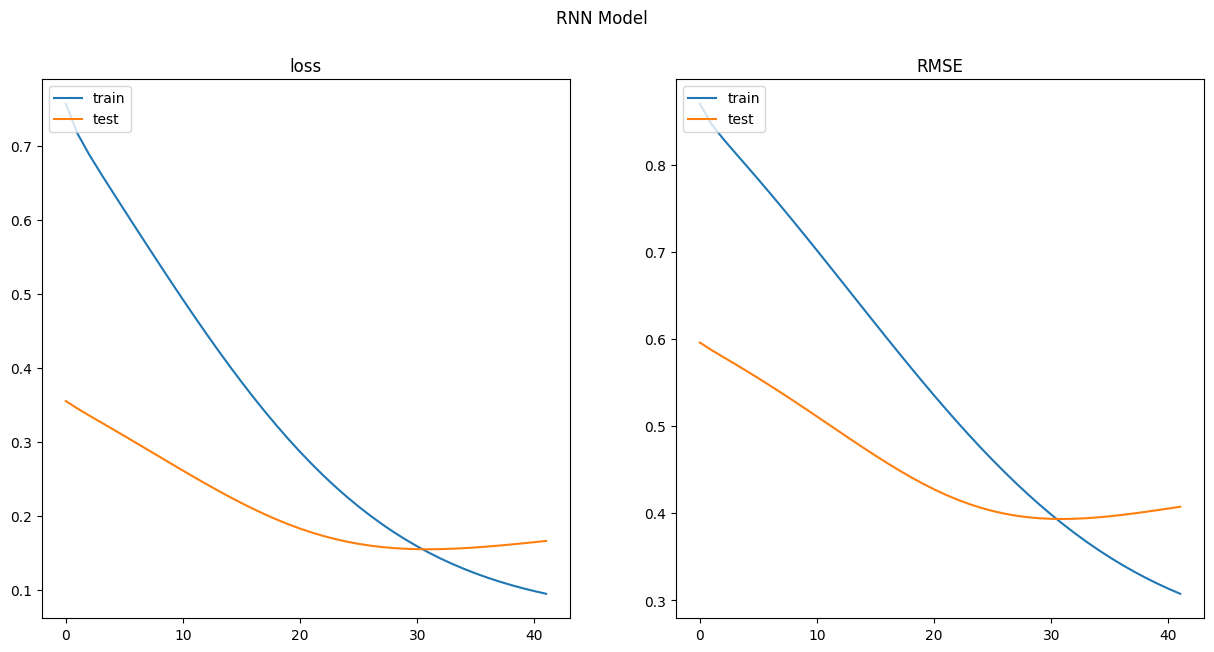

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('RNN Model ')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

There is significant improvement in the predictions in both train and test data but the gap between them is noticabl which implies that the prediction is not that accurate in the test data

### Predictions

In [27]:
from sklearn.metrics import classification_report

y_pred = model_1.predict(X_test)



1/1 [==============================] - 0s 220ms/step


In [28]:
#lets create a data frame which will shows us the actual and the predicted values 
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [29]:
comparison

,actual,predicted
0,172.750000,176.561920
1,181.850006,177.849655
2,163.550003,166.004303
3,174.699997,176.237717
4,178.550003,177.292572
5,174.100006,166.891830
6,171.850006,168.856354
7,184.699997,181.763565


In [30]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(comparison['actual'], comparison['predicted'])
mse

13.755653275919503

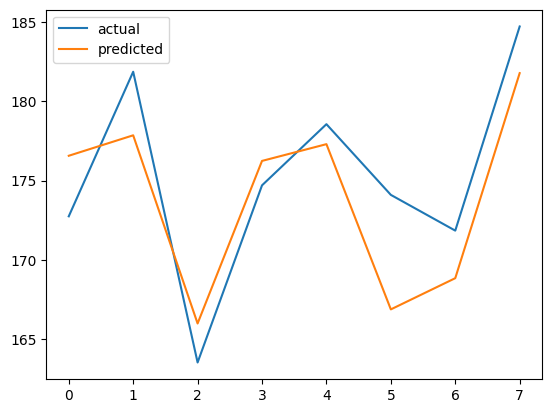

In [31]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

The actual and predicted values are almost the same where it imples RNN is predicting well for the given data

In [70]:
df_results = pd.DataFrame(
    {
        'model': ['RNN'], 
        'mean_squared_error': mse
    }
)

results = pd.concat([results, df_results], ignore_index=True, axis=0)
results



,model,mean_squared_error
0,Deep RNN,49.628978
1,RNN,13.755653
2,RNN,13.755653


# Deep RNN

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training.**

**Since the last layer is DENSE, it can't take sequence data. Therefore, you CANNOT return sequences from the previous layer. So, remove** `return_sequences` **from previous layer.**

In [39]:
n_steps = sequence_length - 1
n_inputs = 1


model_2 = keras.models.Sequential(
    [
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[n_steps, n_inputs]),
        keras.layers.SimpleRNN(10, return_sequences=True),
        keras.layers.SimpleRNN(20, return_sequences=False), 
        keras.layers.Dense(1, activation=activation)
    ]
)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

model_2.compile(
    loss=loss, 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)

In [41]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta=0.0, patience=5, verbose=1, mode='min')

history = model_2.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data = (X_test, y_test), 
    callbacks=[early_stop]
)  

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.5287 - root_mean_squared_error: 1.0164 - val_loss: 0.6848 - val_root_mean_squared_error: 0.8275
Epoch 2/50
1/1 [==============================] - 0s 42ms/step - loss: 1.1796 - root_mean_squared_error: 1.0861 - val_loss: 0.6402 - val_root_mean_squared_error: 0.8001
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 0.9799 - root_mean_squared_error: 0.9899 - val_loss: 0.6126 - val_root_mean_squared_error: 0.7827
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 0.8335 - root_mean_squared_error: 0.9129 - val_loss: 0.5978 - val_root_mean_squared_error: 0.7732
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 0.7231 - root_mean_squared_error: 0.8504 - val_loss: 0.5932 - val_root_mean_squared_error: 0.7702
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.6407 - root_mean_squared_error: 0.8005 - val_loss: 0.5949 - val_root_mean_squared_er

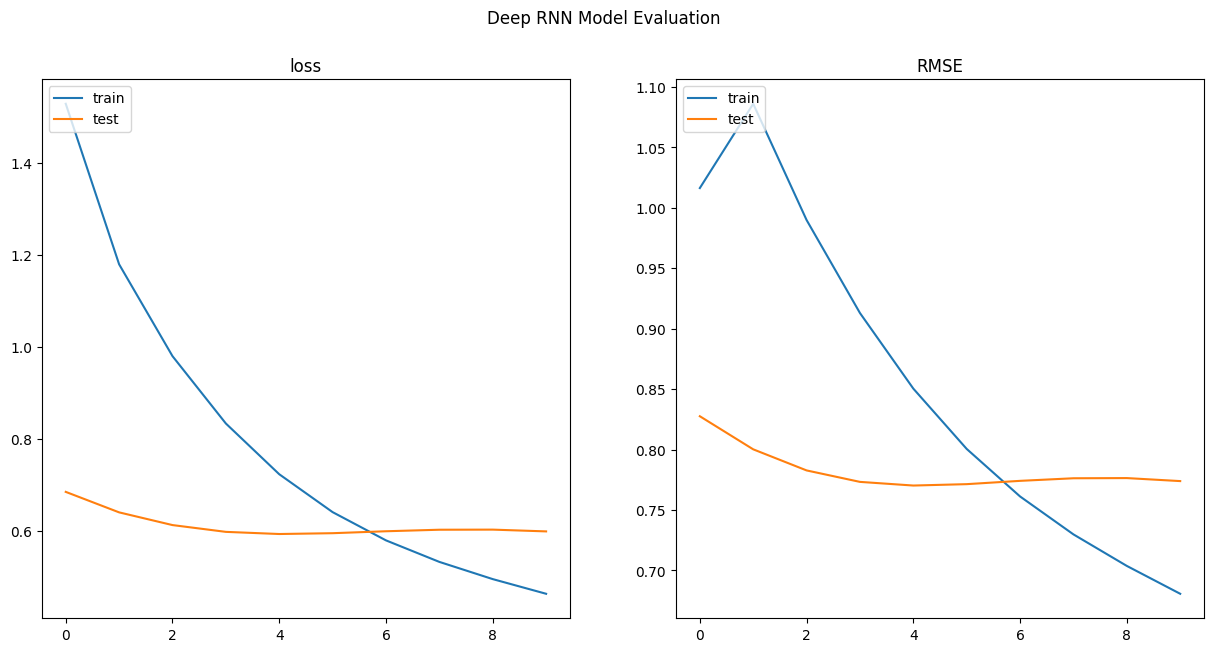

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Deep RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

 With RSME, the test set is not improving as much as the train, which can potentially indicate that it is overfitting the train data. We can clearly see that the loss is improving in both training and test.

### Predictions

In [43]:
#Predict:
y_pred = model_2.predict(X_test)


1/1 [==============================] - 0s 408ms/step


In [44]:


comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [45]:
comparison

,actual,predicted
0,172.750000,177.277252
1,181.850006,166.328857
2,163.550003,165.286972
3,174.699997,172.115143
4,178.550003,175.790527
5,174.100006,164.871017
6,171.850006,172.865448
7,184.699997,179.033325


In [46]:
mse_2=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_2

49.628978182948316

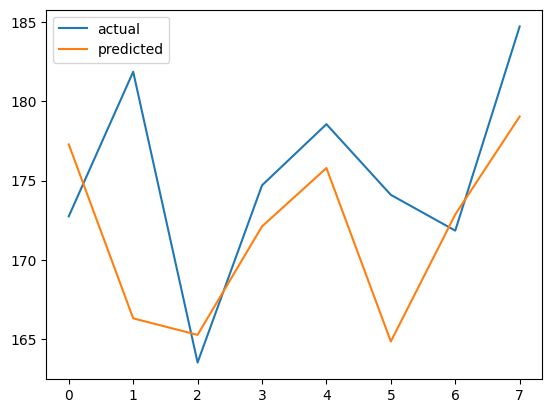

In [47]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [71]:
df_results = pd.DataFrame(
    {
        'model': ['Deep RNN'], 
        'mean_squared_error': mse_2
    }
)

results = pd.concat([results, df_results], ignore_index=True, axis=0)
results


,model,mean_squared_error
0,Deep RNN,49.628978
1,RNN,13.755653
2,RNN,13.755653
3,Deep RNN,49.628978


# LSTM with one layer

In [52]:


model_3 = keras.models.Sequential(
    [
        keras.layers.LSTM(10, input_shape=[n_steps, n_inputs]),
        keras.layers.Dense(1, activation=activation)
    ]
)

In [53]:
model_3.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


###  number of paramaters 

In [55]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model_3.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
) 

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.9044 - root_mean_squared_error: 0.8981 - val_loss: 0.4782 - val_root_mean_squared_error: 0.6915
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 0.8896 - root_mean_squared_error: 0.9432 - val_loss: 0.4759 - val_root_mean_squared_error: 0.6898
Epoch 3/50
1/1 [==============================] - 0s 35ms/step - loss: 0.8789 - root_mean_squared_error: 0.9375 - val_loss: 0.4738 - val_root_mean_squared_error: 0.6883
Epoch 4/50
1/1 [==============================] - 0s 39ms/step - loss: 0.8689 - root_mean_squared_error: 0.9322 - val_loss: 0.4719 - val_root_mean_squared_error: 0.6869
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 0.8591 - root_mean_squared_error: 0.9269 - val_loss: 0.4700 - val_root_mean_squared_error: 0.6855
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.8492 - root_mean_squared_error: 0.9215 - val_loss: 0.4681 - val_root_mean_squared_er

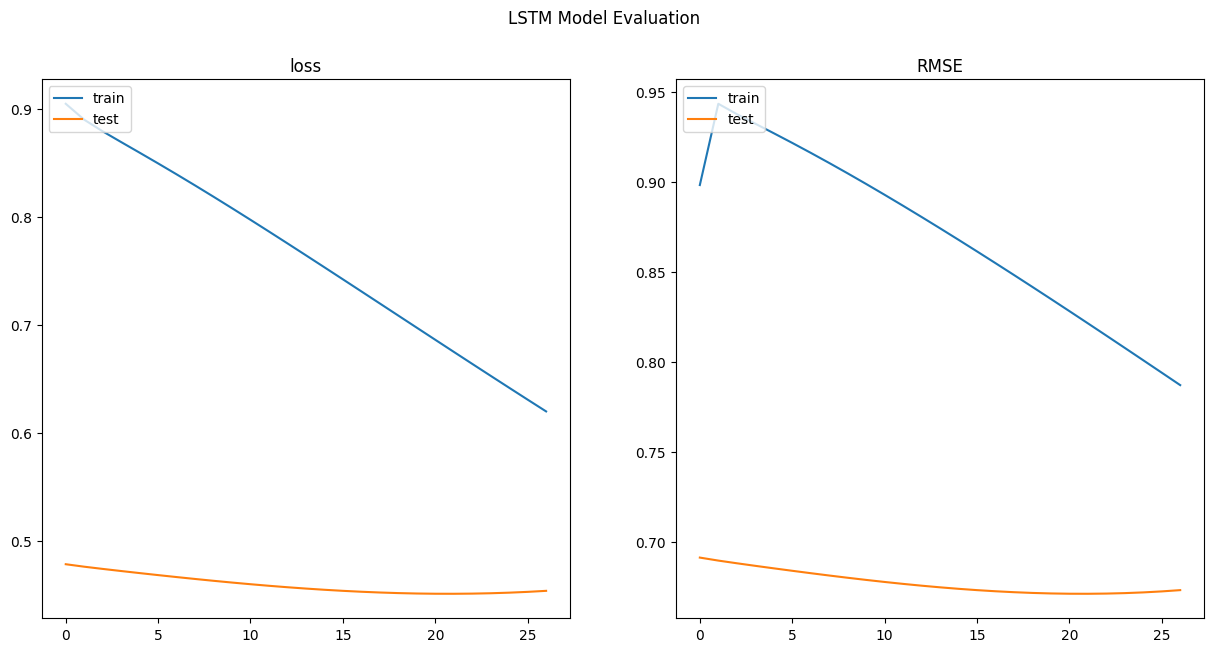

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('LSTM Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

There is an improvement in the train data but no siginificant change in test data

### Predictions

In [58]:
#Predict:
y_pred = model_3.predict(X_test)


1/1 [==============================] - 1s 503ms/step


In [59]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [60]:
mse_3=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_3

37.584523229244

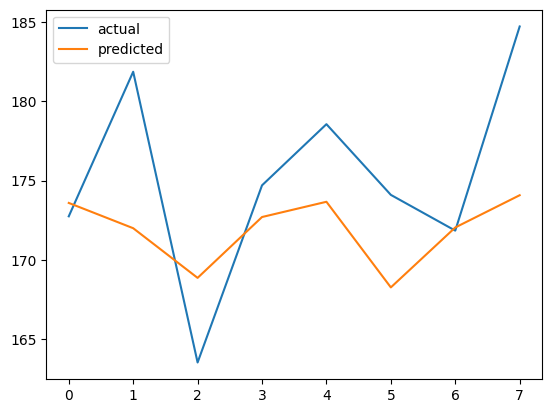

In [61]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

the test prediction has improved compared to the previous models and the MSE  value is also less compared to the DRSME model. Which can be conidered as a good model compared to the previous models.

In [72]:
df_results = pd.DataFrame(
    {
        'model': ['LSTM with one layer'], 
        'mean_squared_error': mse_3
    }
)

results = pd.concat([results, df_results], ignore_index=True, axis=0)
results


,model,mean_squared_error
0,Deep RNN,49.628978
1,RNN,13.755653
2,RNN,13.755653
3,Deep RNN,49.628978
4,LSTM with one layer,37.584523


# LSTM with more layers

In [76]:


model_4 = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.LSTM(20),
    keras.layers.Dense(1, activation=activation)
])

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

model_4.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    metrics=metrics
)

model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 9, 20)             1760      
                                                                 
 lstm_5 (LSTM)               (None, 9, 20)             3280      
                                                                 
 lstm_6 (LSTM)               (None, 20)                3280      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


### number of paramaters

In [78]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 9s 9s/step - loss: 1.0516 - root_mean_squared_error: 0.9275 - val_loss: 0.5376 - val_root_mean_squared_error: 0.7332
Epoch 2/50
1/1 [==============================] - 0s 53ms/step - loss: 1.0245 - root_mean_squared_error: 1.0122 - val_loss: 0.5378 - val_root_mean_squared_error: 0.7334
Epoch 3/50
1/1 [==============================] - 0s 51ms/step - loss: 1.0053 - root_mean_squared_error: 1.0027 - val_loss: 0.5383 - val_root_mean_squared_error: 0.7337
Epoch 4/50
1/1 [==============================] - 0s 50ms/step - loss: 0.9877 - root_mean_squared_error: 0.9938 - val_loss: 0.5391 - val_root_mean_squared_error: 0.7342
Epoch 5/50
1/1 [==============================] - 0s 52ms/step - loss: 0.9702 - root_mean_squared_error: 0.9850 - val_loss: 0.5402 - val_root_mean_squared_error: 0.7350
Epoch 6/50
1/1 [==============================] - 0s 53ms/step - loss: 0.9525 - root_mean_squared_error: 0.9760 - val_loss: 0.5417 - val_root_mean_squared_er

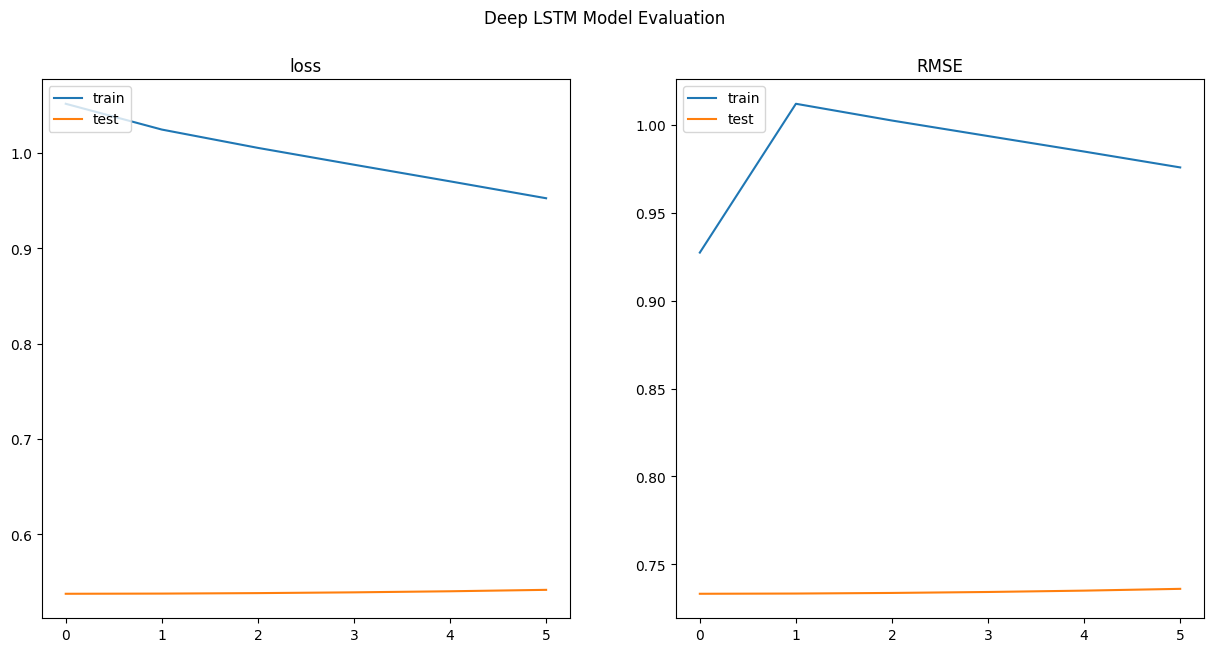

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Deep LSTM Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions

In [80]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [81]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [82]:
mse_4=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_4

44.89587392489199

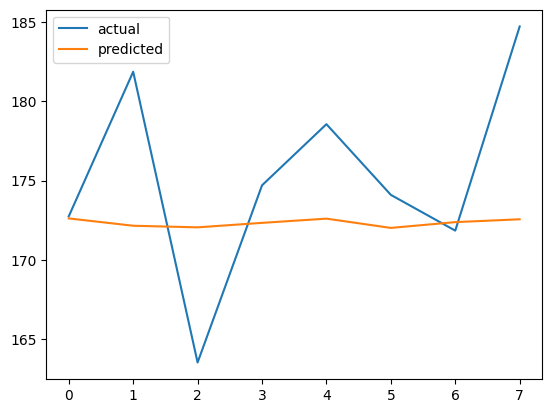

In [83]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

Deep LSTM model is not  good at prdicting the closing stock price of the 10th day

In [85]:
df_results = pd.DataFrame(
    {
        'model': ['Deep LSTM '], 
        'mean_squared_error': mse_4
    }
)

results = pd.concat([results, df_results], ignore_index=True, axis=0)

results

,model,mean_squared_error
0,Deep RNN,49.628978
1,RNN,13.755653
2,RNN,13.755653
3,Deep RNN,49.628978
4,LSTM with one layer,37.584523
5,Deep LSTM,44.895874
6,Deep LSTM,44.895874


# GRU with one layer

In [87]:

model_5 = keras.models.Sequential([
    keras.layers.GRU(15, input_shape=[n_steps, n_inputs]),
    keras.layers.Dense(1, activation=activation)
])

In [88]:
model_5.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15)                810       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


###   number of paramaters

In [89]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 0s 117ms/step - loss: 0.9342 - root_mean_squared_error: 0.9666 - val_loss: 0.5436 - val_root_mean_squared_error: 0.7373
Epoch 2/50
1/1 [==============================] - 0s 49ms/step - loss: 0.9153 - root_mean_squared_error: 0.9567 - val_loss: 0.5460 - val_root_mean_squared_error: 0.7389
Epoch 3/50
1/1 [==============================] - 0s 47ms/step - loss: 0.8957 - root_mean_squared_error: 0.9464 - val_loss: 0.5489 - val_root_mean_squared_error: 0.7409
Epoch 4/50
1/1 [==============================] - 0s 48ms/step - loss: 0.8752 - root_mean_squared_error: 0.9355 - val_loss: 0.5523 - val_root_mean_squared_error: 0.7432
Epoch 5/50
1/1 [==============================] - 0s 51ms/step - loss: 0.8538 - root_mean_squared_error: 0.9240 - val_loss: 0.5564 - val_root_mean_squared_error: 0.7460
Epoch 6/50
1/1 [==============================] - 0s 50ms/step - loss: 0.8315 - root_mean_squared_error: 0.9118 - val_loss: 0.5613 - val_root_mean_squared

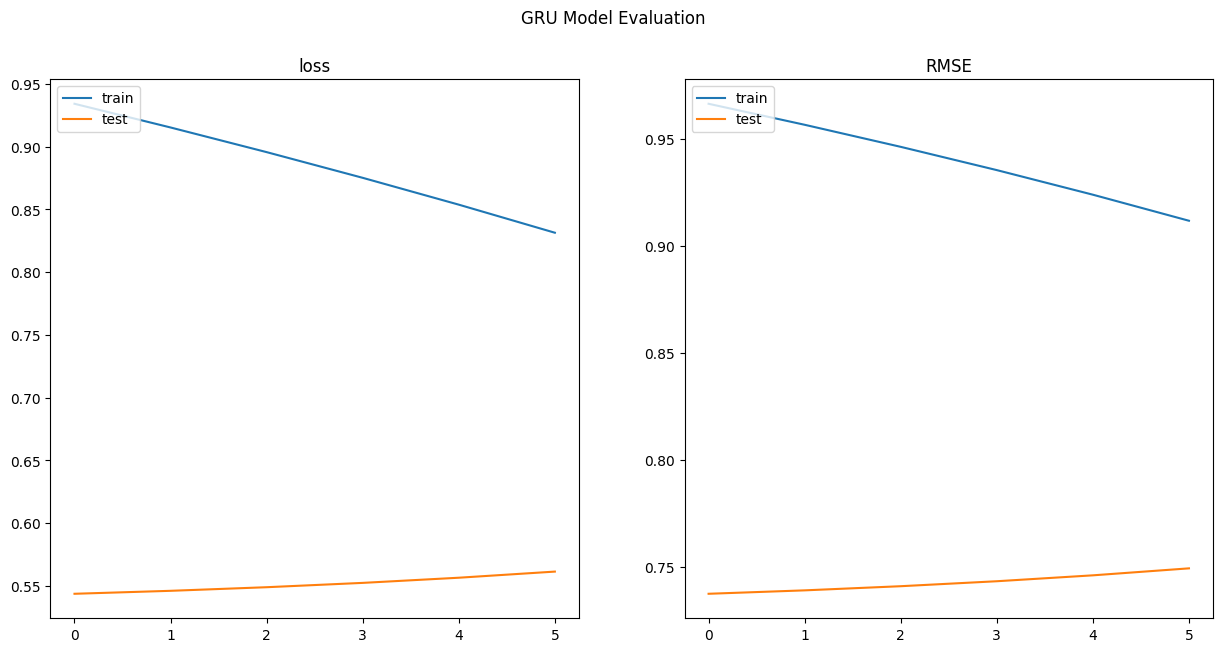

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('GRU Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions

In [91]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [92]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [93]:
mse_5=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_5

46.519262907261684

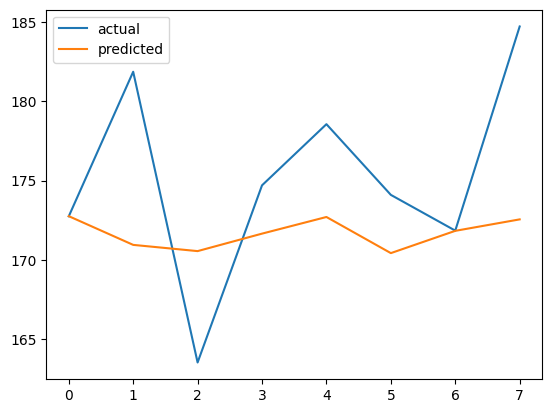

In [94]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

GRU is not that good prediction as  there is significant difference in the test and train vales of the data 

In [96]:
df_results = pd.DataFrame(
    {
        'model': ['Gru with one layer'], 
        'mean_squared_error': mse_5
    }
)

results = pd.concat([results, df_results], ignore_index=True, axis=0)
results

,model,mean_squared_error
0,Deep RNN,49.628978
1,RNN,13.755653
2,RNN,13.755653
3,Deep RNN,49.628978
4,LSTM with one layer,37.584523
5,Deep LSTM,44.895874
6,Deep LSTM,44.895874
7,Gru with one layer,46.519263
8,Gru with one layer,46.519263


# GRU with more layers

In [97]:


model_6 = keras.models.Sequential([
    keras.layers.GRU(10, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.GRU(10, return_sequences=True),
    keras.layers.GRU(10),
    keras.layers.Dense(1, activation=activation)
])

In [98]:
model_6.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 9, 10)             390       
                                                                 
 gru_2 (GRU)                 (None, 9, 10)             660       
                                                                 
 gru_3 (GRU)                 (None, 10)                660       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


###  number of paramaters 

In [99]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 0s 103ms/step - loss: 0.8080 - root_mean_squared_error: 0.8989 - val_loss: 0.5671 - val_root_mean_squared_error: 0.7531
Epoch 2/50
1/1 [==============================] - 0s 48ms/step - loss: 0.7835 - root_mean_squared_error: 0.8852 - val_loss: 0.5740 - val_root_mean_squared_error: 0.7576
Epoch 3/50
1/1 [==============================] - 0s 49ms/step - loss: 0.7578 - root_mean_squared_error: 0.8705 - val_loss: 0.5821 - val_root_mean_squared_error: 0.7630
Epoch 4/50
1/1 [==============================] - 0s 49ms/step - loss: 0.7310 - root_mean_squared_error: 0.8550 - val_loss: 0.5918 - val_root_mean_squared_error: 0.7693
Epoch 5/50
1/1 [==============================] - 0s 50ms/step - loss: 0.7030 - root_mean_squared_error: 0.8385 - val_loss: 0.6034 - val_root_mean_squared_error: 0.7768
Epoch 6/50
1/1 [==============================] - 0s 48ms/step - loss: 0.6741 - root_mean_squared_error: 0.8210 - val_loss: 0.6171 - val_root_mean_squared

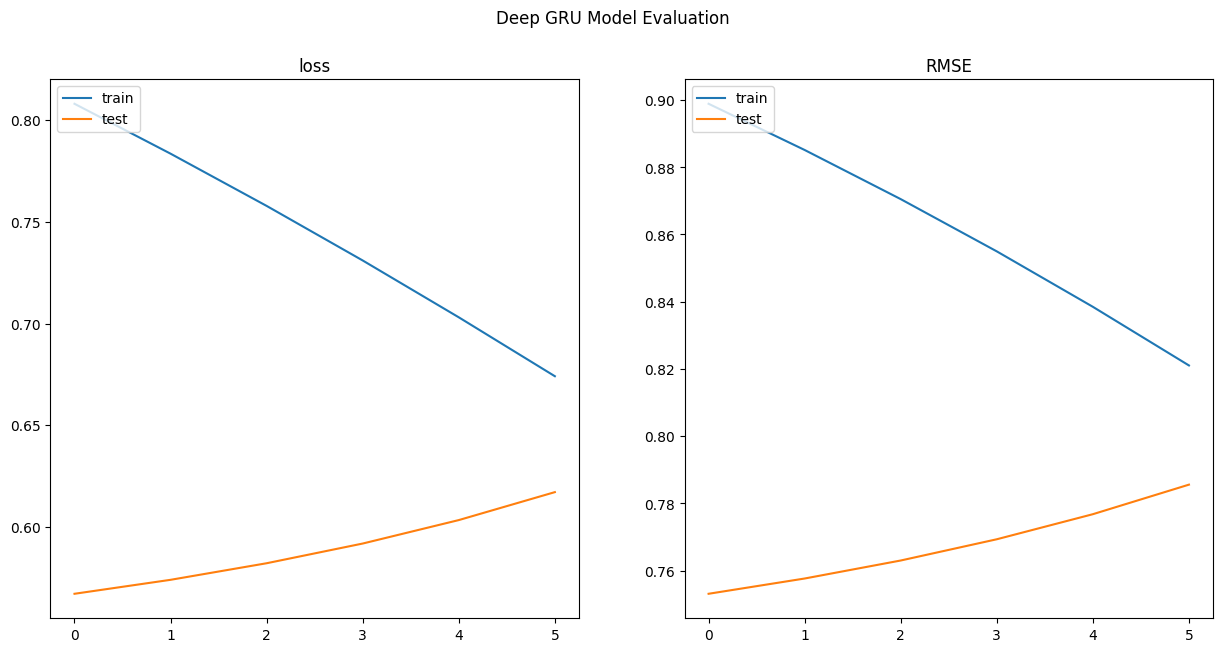

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Deep GRU Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions

In [101]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 25ms/step


In [102]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [103]:
mse_6=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_6

51.140492317520916

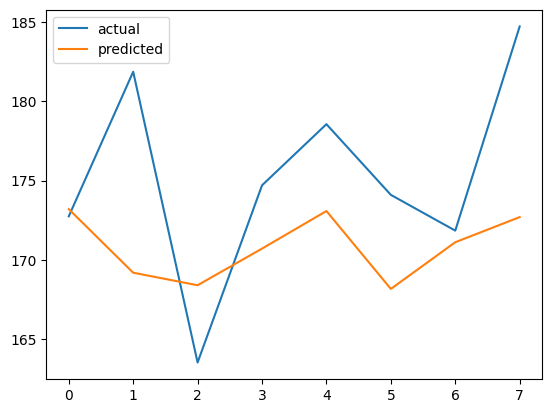

In [104]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

Deep GRU is predicting the closing stock price better than many model and have only  mean square error value

In [105]:
df_results = pd.DataFrame(
    {
        'model': ['Deep GRU'], 
        'mean_squared_error': mse_6
    }
)

results = pd.concat([results, df_results], ignore_index=True, axis=0)
results

,model,mean_squared_error
0,Deep RNN,49.628978
1,RNN,13.755653
2,RNN,13.755653
3,Deep RNN,49.628978
4,LSTM with one layer,37.584523
5,Deep LSTM,44.895874
6,Deep LSTM,44.895874
7,Gru with one layer,46.519263
8,Gru with one layer,46.519263
9,Deep GRU,51.140492


# Conv1D

In [106]:


model_7 = keras.models.Sequential([
    keras.layers.Conv1D(filters=10, kernel_size=3, strides=1, padding="valid", input_shape=[n_steps, n_inputs]),
    keras.layers.Conv1D(filters=15, kernel_size=3, strides=1, padding="valid"),
    keras.layers.LSTM(10, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation=activation)
])

model_7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 10)             40        
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 15)             465       
                                                                 
 lstm_7 (LSTM)               (None, 5, 10)             1040      
                                                                 
 lstm_8 (LSTM)               (None, 32)                5504      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,082
Trainable params: 7,082
Non-trainable params: 0
_________________________________________________________________


In [107]:
model_7.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.010), 
    metrics=metrics
)

In [108]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model_7.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop] 
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 0.9749 - root_mean_squared_error: 0.9276 - val_loss: 0.5257 - val_root_mean_squared_error: 0.7250
Epoch 2/50
1/1 [==============================] - 0s 47ms/step - loss: 0.7879 - root_mean_squared_error: 0.8876 - val_loss: 0.5992 - val_root_mean_squared_error: 0.7741
Epoch 3/50
1/1 [==============================] - 0s 78ms/step - loss: 0.6045 - root_mean_squared_error: 0.7775 - val_loss: 0.8074 - val_root_mean_squared_error: 0.8986
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 0.4577 - root_mean_squared_error: 0.6766 - val_loss: 0.8856 - val_root_mean_squared_error: 0.9411
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 0.4069 - root_mean_squared_error: 0.6379 - val_loss: 0.7527 - val_root_mean_squared_error: 0.8676
Epoch 6/50
1/1 [==============================] - 0s 73ms/step - loss: 0.3715 - root_mean_squared_error: 0.6095 - val_loss: 0.8526 - val_root_mean_squared_er

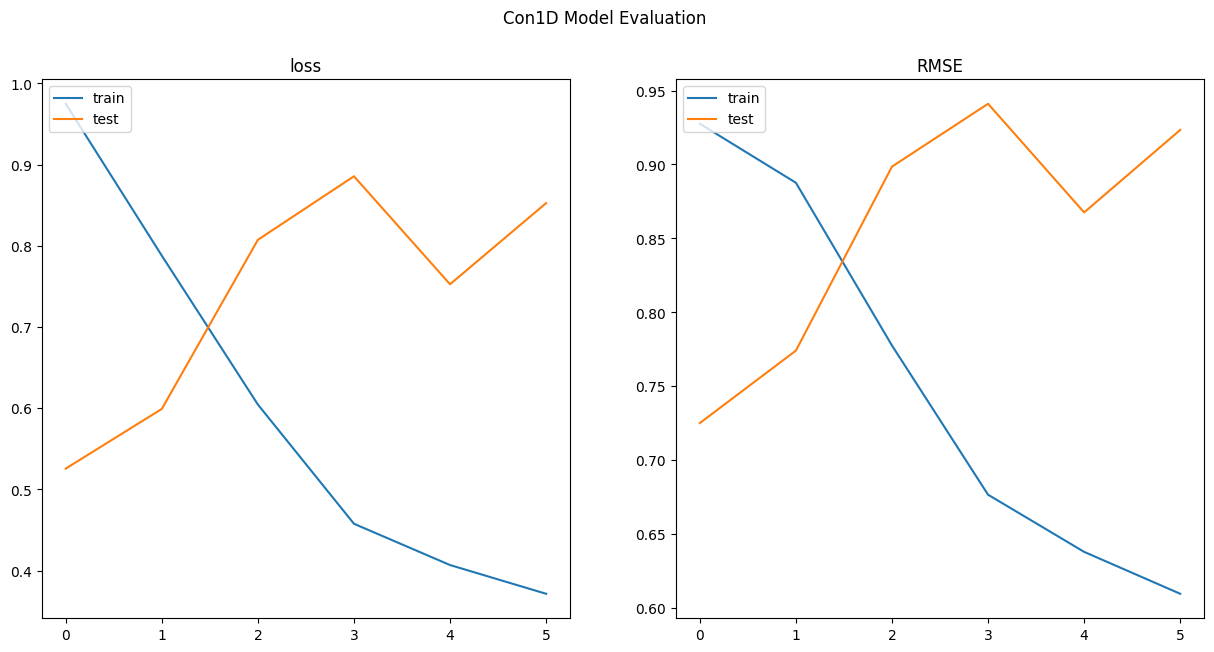

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Con1D Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions

In [110]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [111]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [112]:
mse_7=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_7

51.140492317520916

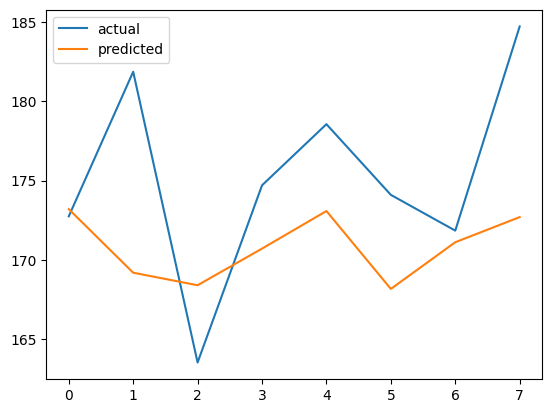

In [113]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

This model has somewhat good prediction as there is similarity between test and train values. 

In [114]:
df_results = pd.DataFrame(
    {
        'model': ['CONV1D'], 
        'mean_squared_error': mse_7
    }
)

results = pd.concat([results, df_results], ignore_index=True, axis=0)
results

,model,mean_squared_error
0,Deep RNN,49.628978
1,RNN,13.755653
2,RNN,13.755653
3,Deep RNN,49.628978
4,LSTM with one layer,37.584523
5,Deep LSTM,44.895874
6,Deep LSTM,44.895874
7,Gru with one layer,46.519263
8,Gru with one layer,46.519263
9,Deep GRU,51.140492


## Conclusion

In [115]:
df_results.sort_values(by=['mean_squared_error'], ascending=True)

,model,mean_squared_error
0,CONV1D,51.140492


After performing all the seven models  both RNN and Deep RNN are having the test and train values almost same where there is significant improvement in the prediction values but the mean square value of RNN is less compared to Deep RNN so we can conclude that RNN is the best predictive model for the provided data set